<a href="https://colab.research.google.com/github/Deeksha-Data-Scientist/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv" ,encoding= 'unicode_escape')

In [4]:
len(dataset)

8760

In [6]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
dataset.shape

(8760, 14)

In [8]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


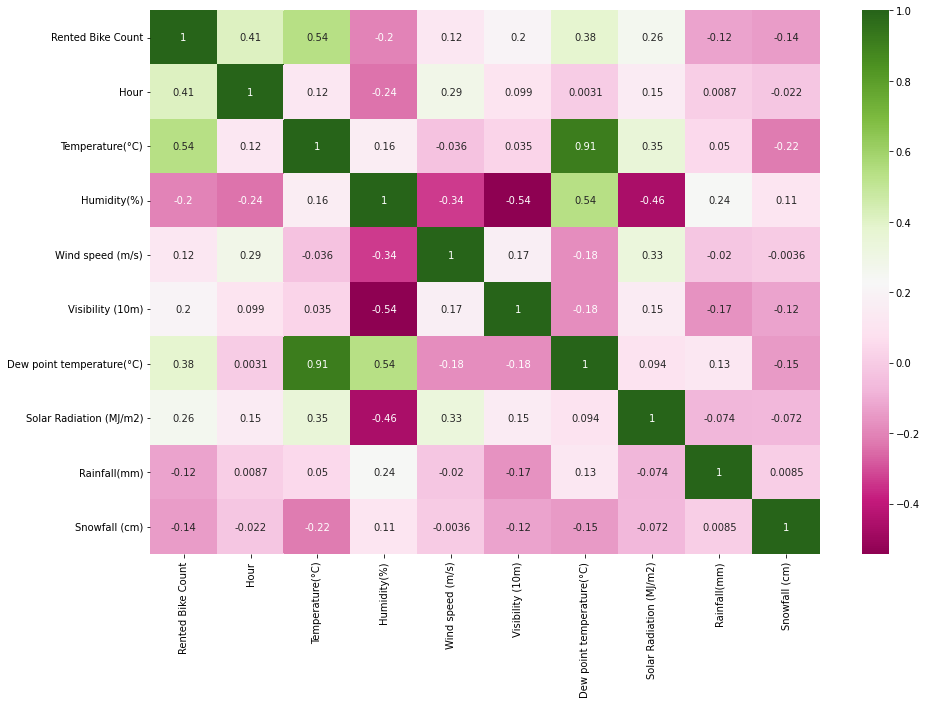

In [14]:


#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='PiYG',annot=True)



There is high correlation between Temperature and Dew_point_temperature.

**Exploratory Data Analysis(EDA)**

In [15]:


# Date columns to Date format conversion

dataset['Date']= pd.to_datetime(dataset['Date'])



In [23]:
# extracting day,month, day of week and weekdays/weekend from date column

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].apply(lambda x : x.month)
dataset['year'] = dataset['Date'].apply(lambda x : x.year)
dataset['day'] = dataset['Date'].apply(lambda x : x.day)
dataset['day_of_week'] = dataset['Date'].dt.day_name()
dataset['weekdays_weekend']=dataset['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day_of_week'],axis=1)

In [17]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'day', 'day_of_week',
       'weekdays_weekend'],
      dtype='object')

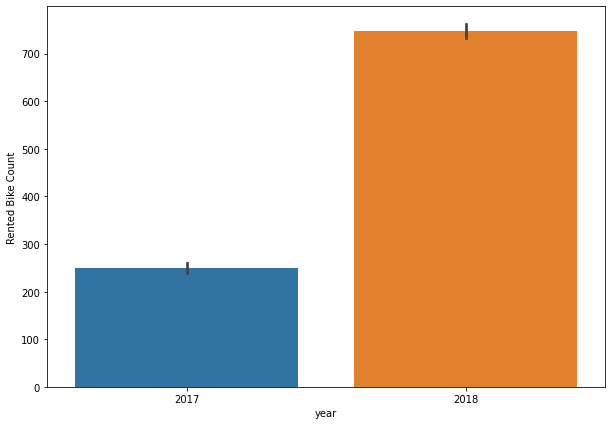

In [69]:
# Rented Bike count Yearwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.year,y=dataset['Rented Bike Count'])

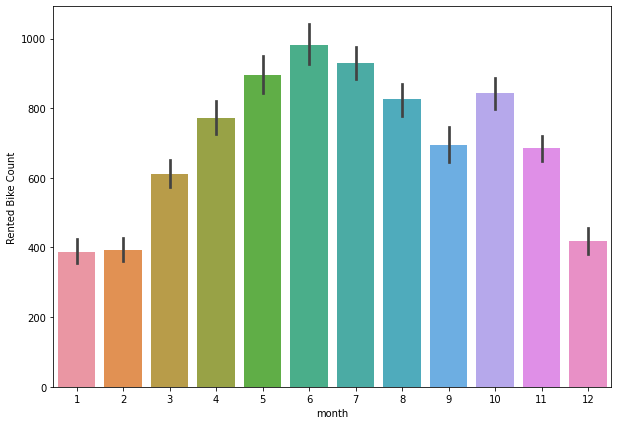

In [70]:
# Rented Bike count Monthwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.month,y=dataset['Rented Bike Count'])

Rented bike demand is higher in the month of May, June, July

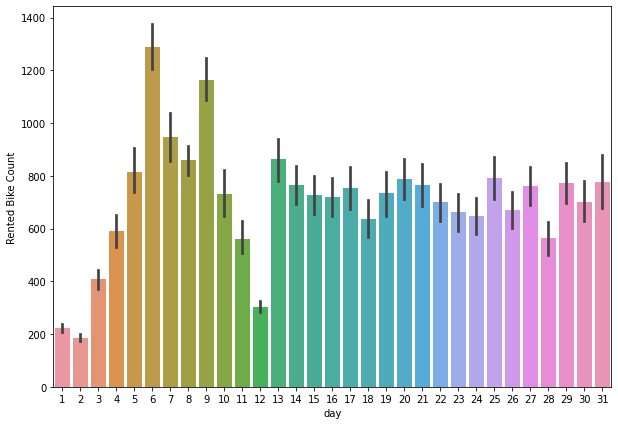

In [71]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.day,y=dataset['Rented Bike Count'])

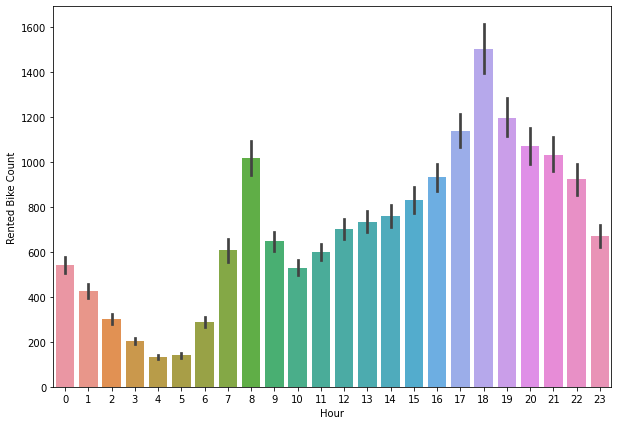

In [94]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Hour,y=dataset['Rented Bike Count'])

we can see that Rented Bike demand is higher in day 6 , 7 & 9 .

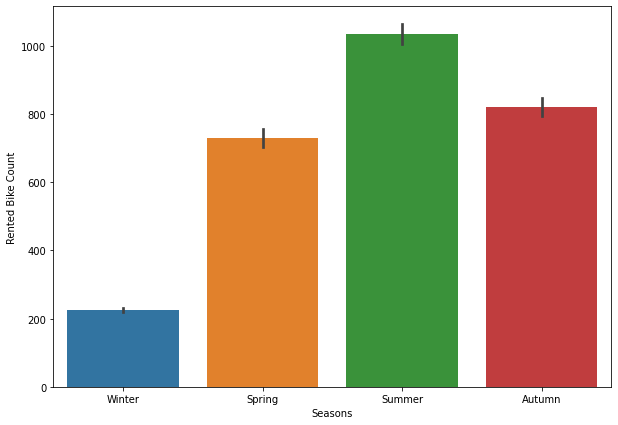

In [72]:
# Rented Bike count Seasonwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Seasons,y=dataset['Rented Bike Count'])

The above plot shows that in Summer, Autumn and, Spring seasons have Higher Rented bike demand.

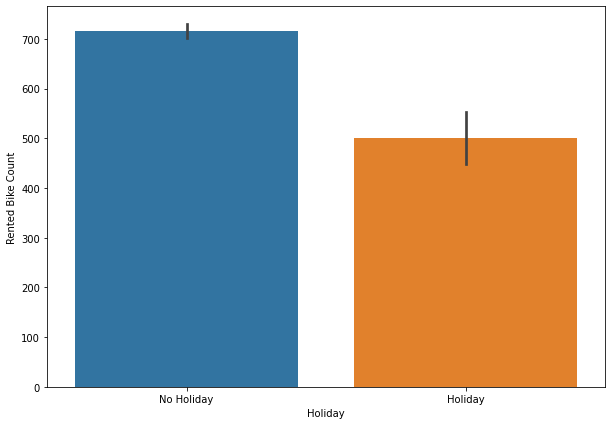

In [73]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Holiday,y=dataset['Rented Bike Count'])

The above plot shows that in No holiday have Higher Rented bike demand.

**Distribution plot of rented bike count**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


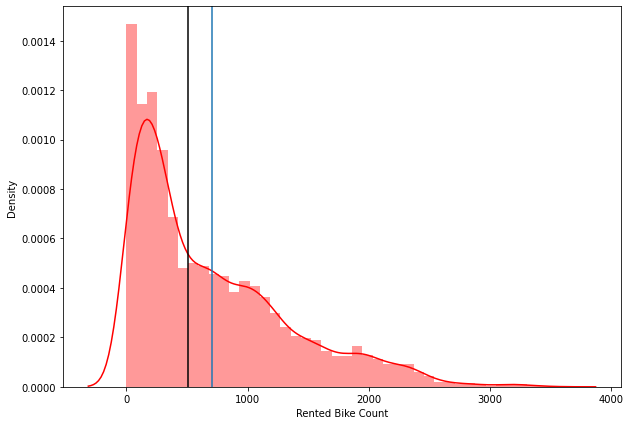

In [137]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,7))
plt.xlabel("rented bike count")
plt.ylabel("Density")
dist=sns.distplot(dataset['Rented Bike Count'],hist=True,color="Red")
dist.axvline(dataset['Rented Bike Count'].mean())
dist.axvline(dataset['Rented Bike Count'].median(),color='black')
plt.show()


In distribution graph we can see that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that ‘the distribution of dependent variable has to be normal’, so we should perform some operation to make it normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


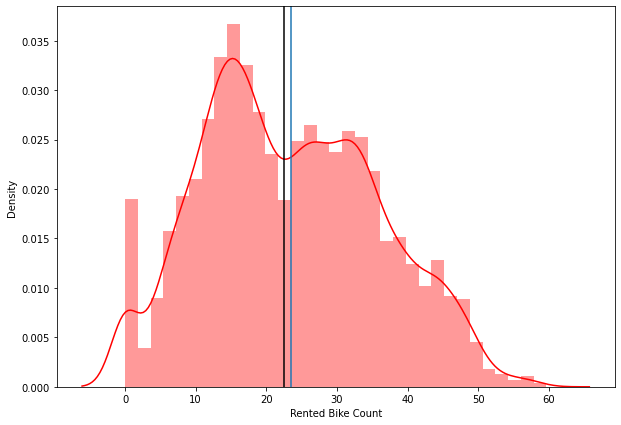

In [138]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,7))
plt.xlabel("rented bike count")
plt.ylabel("Density")
dist=sns.distplot(np.sqrt(dataset['Rented Bike Count']),hist=True,color="Red")
dist.axvline(np.sqrt(dataset['Rented Bike Count']).mean())
dist.axvline(np.sqrt(dataset['Rented Bike Count']).median(),color='black')
plt.show()

Since generic rule for the skewed variable is Square root  in order to make it normal, Now we have get here almost normal distribution.

**`Creating Train and Test Dataset`**

In [37]:
numeric_features= dataset.select_dtypes(exclude='object')
categorical_features= dataset.select_dtypes(include='object')
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)


In [25]:
numeric_features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,2018,30,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,2018,30,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,2018,30,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,2018,30,0


In [26]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [27]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [38]:
final_dataset= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
final_dataset.columns

Index(['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Rented Bike Count',
       'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'day', 'weekdays_weekend'],
      dtype='object')

In [39]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [33]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))

  plt.legend(["Predicted","Actual"])
  plt.show()



In [34]:
# Creating Train and Test Dataset
x=final_dataset.drop(['Rented Bike Count'],axis=1)
y=np.sqrt(final_dataset['Rented Bike Count'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)

(6570, 18)
(2190, 18)



================Evalution Matrix=========================

MSE : 174879.26458588152
RMSE : 418.18568194748315
R2 : 0.5746409013441218
Adjusted R2 :  0.5711142022304387

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



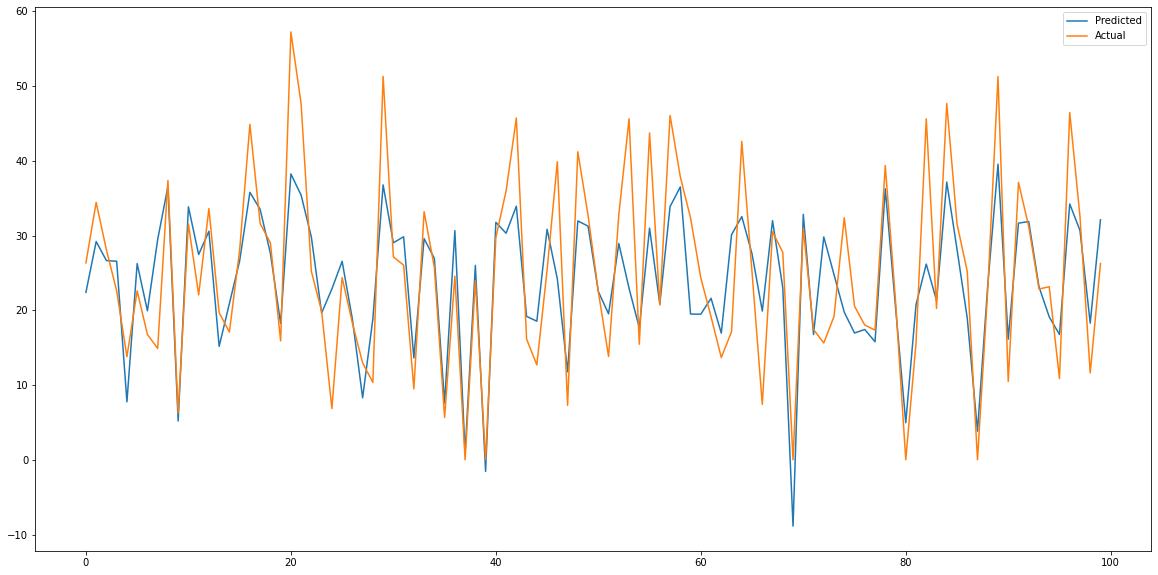

In [41]:
#linear regression model
linear_modal=LinearRegression()
train_linear_model(linear_modal,x_train,y_train,x_test,y_test)